# Tópicos Especiais em Matemática e Computação - 2024.1

## Trabalho 1

**Aluno:** Matheus da Costa Harduim

**Prof:** Camila Martins Saporetti

Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import decomposition
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
penguins = sns.load_dataset("penguins")

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
print(penguins[penguins.duplicated() == True])
# Não possui dados duplicados

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []


In [5]:
penguins.isnull().sum()
# Com campos nulos

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# balanceamento nominal
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [7]:
penguins = penguins.dropna()

In [8]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [9]:
# balanceamento nominal
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [10]:
print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [11]:
penguins.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
# Armazenado para a exposicao nos graficos PCA
target_names = penguins.species.unique()
# Transformacao parametros categoricos para numericos
le = preprocessing.LabelEncoder()
penguins.species = le.fit_transform(penguins.species)
penguins.island = le.fit_transform(penguins.island)
penguins.sex = le.fit_transform(penguins.sex)

In [13]:
target_names

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [14]:
print(penguins)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2            39.1           18.7              181.0   
1          0       2            39.5           17.4              186.0   
2          0       2            40.3           18.0              195.0   
4          0       2            36.7           19.3              193.0   
5          0       2            39.3           20.6              190.0   
..       ...     ...             ...            ...                ...   
338        2       0            47.2           13.7              214.0   
340        2       0            46.8           14.3              215.0   
341        2       0            50.4           15.7              222.0   
342        2       0            45.2           14.8              212.0   
343        2       0            49.9           16.1              213.0   

     body_mass_g  sex  
0         3750.0    1  
1         3800.0    0  
2         3250.0    0  
4         3450.

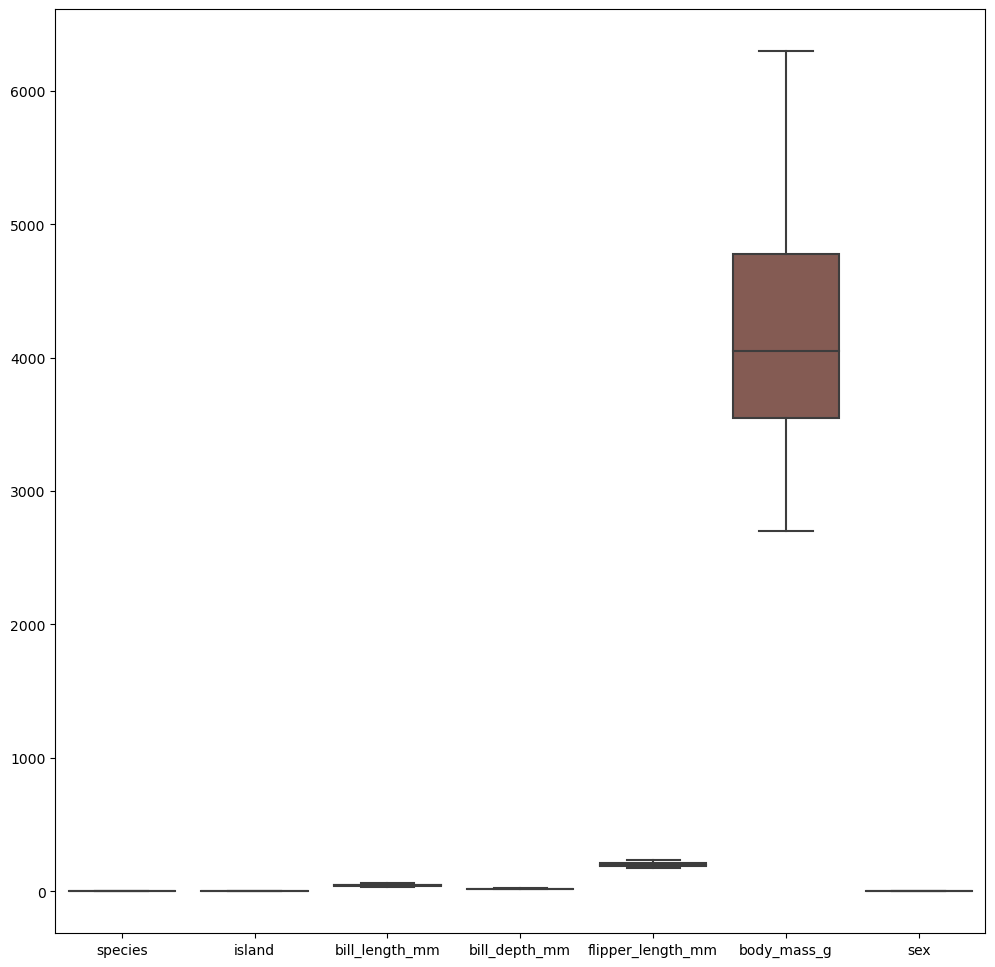

In [15]:
plt.figure(figsize=(12, 12))
sns.boxplot(data=penguins).get_figure().savefig('box_plot_principal')

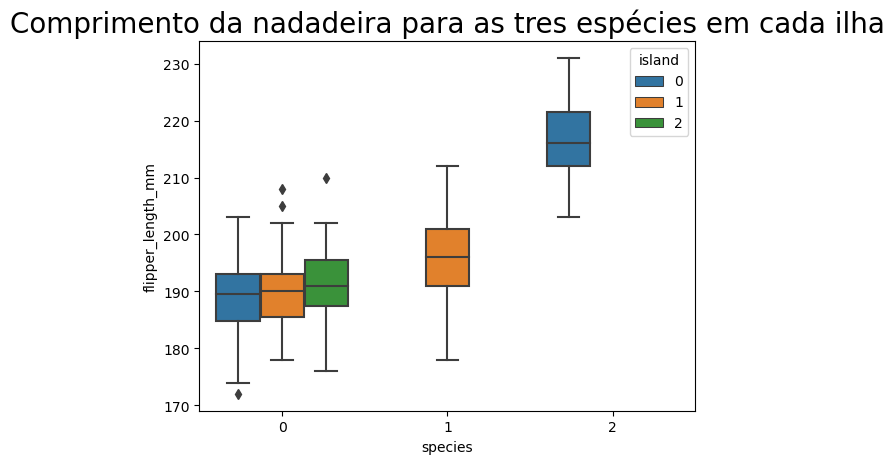

In [16]:
# Como o boxplot comum
plt.title("Comprimento da nadadeira para as tres espécies em cada ilha", size=20)
sns.boxplot(x = "species", y = "flipper_length_mm",
            data =penguins, hue = "island").get_figure().savefig('box_plot1')

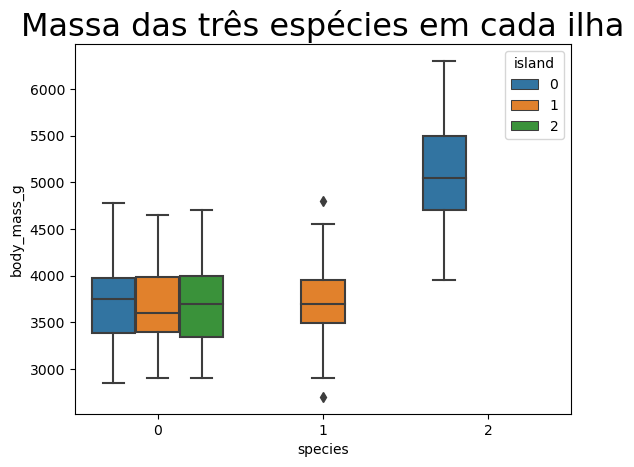

In [17]:
plt.title("Massa das três espécies em cada ilha", size=23)
sns.boxplot(x = "species", y = "body_mass_g", data =penguins, hue = "island").get_figure().savefig('box_plot4')

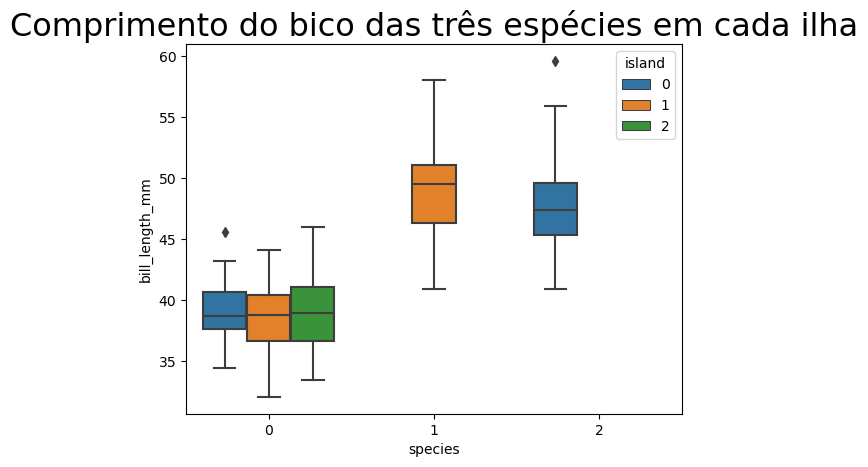

In [18]:
plt.title("Comprimento do bico das três espécies em cada ilha", size=23)
sns.boxplot(x = "species", y = "bill_length_mm", data =penguins, hue = "island").get_figure().savefig('box_plot2')

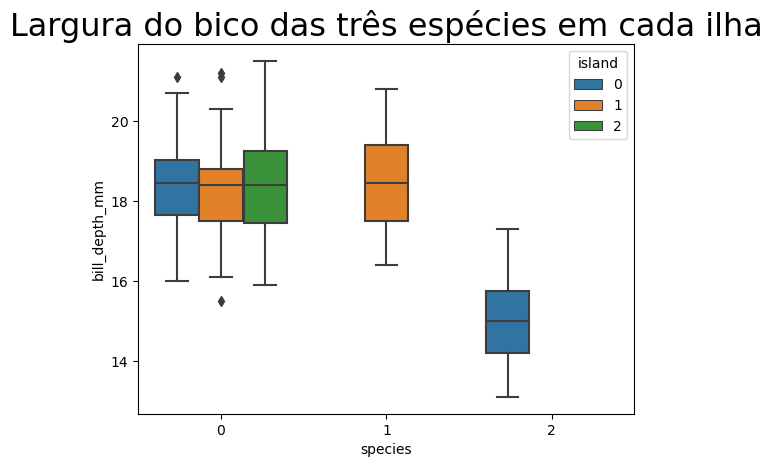

In [19]:
plt.title("Largura do bico das três espécies em cada ilha", size=23)
sns.boxplot(x = "species", y = "bill_depth_mm", data =penguins, hue = "island").get_figure().savefig('box_plot3')

In [20]:
print(f'Media:\n------------\n{penguins.mean()}')
print(f'Desvio:\n------------\n{penguins.std()}')
print(f'Variancia:\n------------\n{penguins.var()}')
print(f'Minimo:\n------------\n{penguins.min()}')
print(f'Maximo:\n------------\n{penguins.max()}')
print(f'Matriz de Corelacao:\n------------\n{penguins.corr()}')

Media:
------------
species                 0.918919
island                  0.651652
bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
sex                     0.504505
dtype: float64
Desvio:
------------
species                0.889718
island                 0.714715
bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
sex                    0.500732
dtype: float64
Variancia:
------------
species                   0.791599
island                    0.510818
bill_length_mm           29.906333
bill_depth_mm             3.877888
flipper_length_mm       196.441677
body_mass_g          648372.487699
sex                       0.250733
dtype: float64
Minimo:
------------
species                 0.0
island                  0.0
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
s

In [21]:
penguins.corr()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.622428,0.730548,-0.740346,0.850737,0.750434,0.010964
island,-0.622428,1.000000,-0.337179,0.568031,-0.554413,-0.559526,-0.012435
bill_length_mm,0.730548,-0.337179,1.000000,-0.228626,0.653096,0.589451,0.344078
bill_depth_mm,-0.740346,0.568031,-0.228626,1.000000,-0.577792,-0.472016,0.372673
flipper_length_mm,0.850737,-0.554413,0.653096,-0.577792,1.000000,0.872979,0.255169
body_mass_g,0.750434,-0.559526,0.589451,-0.472016,0.872979,1.000000,0.424987
sex,0.010964,-0.012435,0.344078,0.372673,0.255169,0.424987,1.000000


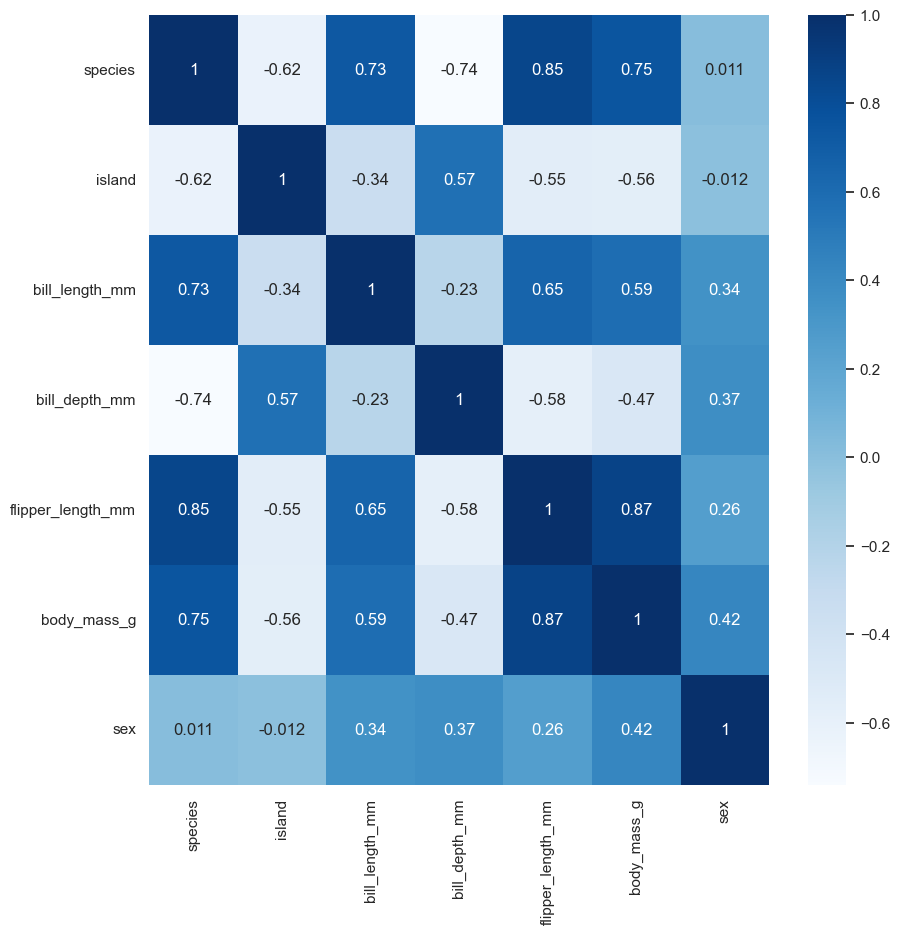

In [22]:
correlacoes = penguins.corr()
sns.set(rc={'figure.figsize':(10,10)})
mapa_de_calor = sns.heatmap(correlacoes, annot=True, cmap='Blues')
mapa_de_calor.get_figure().savefig('mapa_de_calor')

In [23]:
X = penguins.drop(columns=['species'])
y = np.array(penguins['species'])

In [24]:
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xr = pca.transform(X)

In [25]:
print(pca.components_.T)

[[-4.96594100e-04  1.33036936e-02  1.50902750e-02]
 [ 4.00316117e-03 -3.18928316e-01  9.40727549e-01]
 [-1.15432719e-03  8.70966964e-02  1.45745459e-01]
 [ 1.51945451e-02 -9.43431517e-01 -3.03777353e-01]
 [ 9.99875718e-01  1.57169862e-02  1.01627738e-03]
 [ 2.64231446e-04  1.45552245e-02  3.57842171e-02]]


In [26]:
pca.explained_variance_ratio_

array([9.99892372e-01, 7.82533781e-05, 2.49443592e-05])

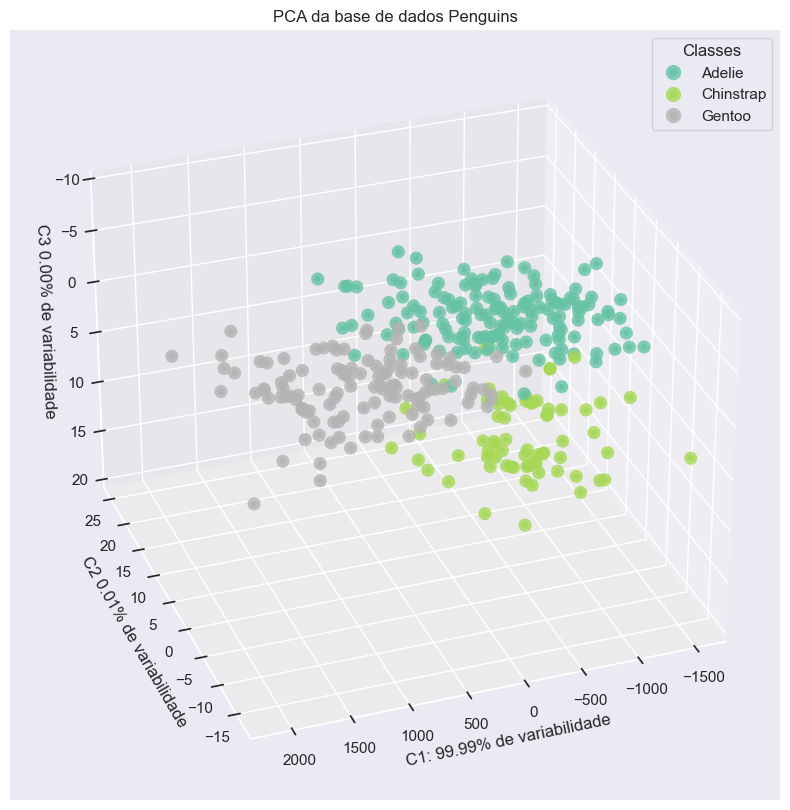

In [27]:
fig = plt.figure(4,figsize=(10, 10))
ax = fig.add_subplot(projection='3d',elev=-150, azim=110)


scatter4=ax.scatter(Xr[:, 0], Xr[:, 1], Xr[:, 2], c=y, alpha=.8, lw=5, cmap='Set2')

ax.set_xlabel('C1: '+ str("{:.2f}".
format(100*pca.explained_variance_ratio_[0])) + '% de variabilidade')
ax.set_ylabel('C2 ' + str("{:.2f}".
format(100*pca.explained_variance_ratio_[1])) + '% de variabilidade')
ax.set_zlabel('C3 ' + str("{:.2f}".
format(100*pca.explained_variance_ratio_[2])) + '% de variabilidade')
ax.legend(scatter4.legend_elements()[0],target_names, loc="best", title="Classes")
plt.title('PCA da base de dados Penguins')
plt.savefig('variabilidade.png', format='png')

In [28]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...
338,0,47.2,13.7,214.0,4925.0,0
340,0,46.8,14.3,215.0,4850.0,0
341,0,50.4,15.7,222.0,5750.0,1
342,0,45.2,14.8,212.0,5200.0,0


In [29]:
selector = SelectKBest(f_classif, k=2)
X_new_selected =selector.fit_transform(X, y)
y_new_selected = y
print(X_new_selected.shape)
filter = selector.get_support()
print('SelectKbest'+str(np.array(penguins.columns[1:])[filter]))

(333, 2)
SelectKbest['bill_length_mm' 'flipper_length_mm']


In [30]:
cluster_methods=[
  ('DBSCAN', DBSCAN(),
     [
	{'eps':[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,1.1,1.2],
	 'min_samples':[3,4,5,6,7,8,9,10,11],}
     ]
    )
]

In [31]:
n_cluster_methods = len(cluster_methods)

In [32]:
dataset_name,data, y = 'Penguin',StandardScaler().fit_transform(penguins.drop(columns=
['species', 'island','sex'])), y

In [33]:
nsamples = data.shape[0]

In [34]:
data

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

Parametro: {'eps': 0.4, 'min_samples': 3} Score: 1.7721068053884914
Parametro: {'eps': 0.4, 'min_samples': 4} Score: 1.8479889849827325
Parametro: {'eps': 0.4, 'min_samples': 5} Score: 1.8049683256297502
Parametro: {'eps': 0.4, 'min_samples': 6} Score: 1.6872069504839484
Parametro: {'eps': 0.4, 'min_samples': 7} Score: 1.4402527608195272
Parametro: {'eps': 0.4, 'min_samples': 8} Score: 1.128340619410998
Parametro: {'eps': 0.4, 'min_samples': 9} Score: 1.0542971902359526
Parametro: {'eps': 0.4, 'min_samples': 10} Score: 1.071740409614135
Parametro: {'eps': 0.4, 'min_samples': 11} Score: 1.0756334294529086
Parametro: {'eps': 0.5, 'min_samples': 3} Score: 2.0644212834283757
Parametro: {'eps': 0.5, 'min_samples': 4} Score: 1.8382820734414551
Parametro: {'eps': 0.5, 'min_samples': 5} Score: 2.0112107970465107
Parametro: {'eps': 0.5, 'min_samples': 6} Score: 1.9048678316976286
Parametro: {'eps': 0.5, 'min_samples': 7} Score: 1.9381392344870285
Parametro: {'eps': 0.5, 'min_samples': 8} Score:

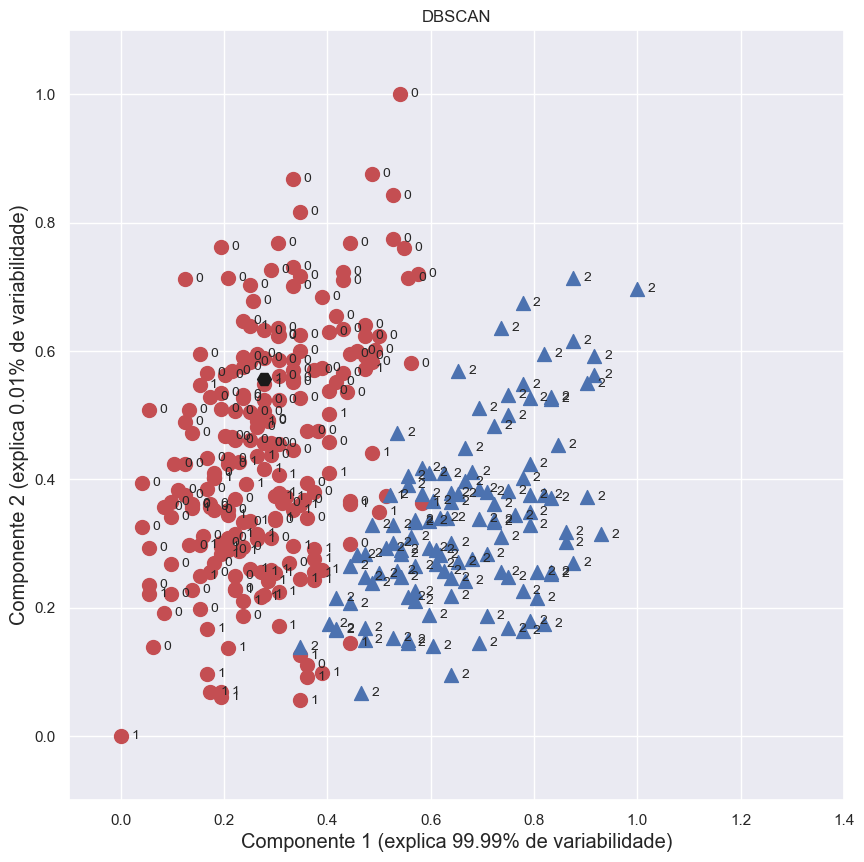

In [35]:
for clf_name, clf, clf_params in cluster_methods:

    par=list(ParameterGrid(clf_params))


    best_estimator=clf
    best_params=par[0]

    #inicilaiza com um valor alto porque no caso do Davies Bouldin queremos o menor valor
    best_score=1e12

    for i in par:
      m=clf.set_params(**i)
      y_pred = m.fit_predict(data)
      db =  metrics.davies_bouldin_score(data, y_pred)
      print(f'Parametro: {i} Score: {db}')
      if db<best_score:
          best_score=db
          best_params=i

    print("Melhor score: "+str(best_score)+" Melhores parâmetros: "+str(best_params))
    clf=clf.set_params(**best_params)


    y_pred = clf.fit_predict(data)


    n_cluster = len(set(y_pred))

    col=['r','b','g','m','y','c']
    clabel=[int(x) for x in y_pred]
    for i in range(len(clabel)):
      k=clabel[i]
      if k == -1:
          clabel[i]='k'
      else:
          clabel[i]=col[k]

    mar=['o','^','*','x','+']
    mlabel=[int(x) for x in y_pred]
    for i in range(len(mlabel)):
      l=mlabel[i]
      if l == -1:
          mlabel[i]='H'
      else:
          mlabel[i]=mar[l]

    pca = decomposition.PCA(n_components = 2)

    cluster_reduced_data = pca.fit_transform(X)

    fig = plt.figure()
    x1=cluster_reduced_data[:,0]; y1=cluster_reduced_data[:,1]

    x1=(x1-x1.min()) /  (x1.max()-x1.min())
    y1=(y1-y1.min()) /  (y1.max()-y1.min())

    for i in range(len(x1)):
      plt.scatter(x1[i],y1[i],marker=mlabel[i],s=100,c=clabel[i])
      plt.text(x1[i]+0.02, y1[i]+0.00, '%s' % y[i], ha='left',va='center',fontsize=10)
    plt.xlim(-0.1, +1.4), plt.ylim(-0.1, +1.1)
    plt.xlabel('Componente 1 (explica '+str("{:.2f}".
    format(100*pca.explained_variance_ratio_[0]))+'% de variabilidade)',size='large')
    plt.ylabel('Componente 2 (explica '+str("{:.2f}".
    format(100*pca.explained_variance_ratio_[1]))+'% de variabilidade)',size='large')
    plt.title(clf_name)
    plt.savefig(clf_name+'1.png',bbox_inches=0)

In [36]:
cluster_methods=[
  ('DBSCAN', DBSCAN(),
     [
	{'eps':[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,1.1,1.2],
	 'min_samples':[3,4,5,6,7,8,9,10,11],}
     ]
    )
]

In [37]:
n_cluster_methods = len(cluster_methods)

In [38]:
dataset_name,data, y = 'Penguin',StandardScaler().fit_transform(X_new_selected), y_new_selected

In [39]:
nsamples = data.shape[0]

Parametro: {'eps': 0.4, 'min_samples': 3} Score: 2.051324512558689
Parametro: {'eps': 0.4, 'min_samples': 4} Score: 2.8033247882508605
Parametro: {'eps': 0.4, 'min_samples': 5} Score: 2.8033247882508605
Parametro: {'eps': 0.4, 'min_samples': 6} Score: 2.8033247882508605
Parametro: {'eps': 0.4, 'min_samples': 7} Score: 2.8033247882508605
Parametro: {'eps': 0.4, 'min_samples': 8} Score: 2.8033247882508605
Parametro: {'eps': 0.4, 'min_samples': 9} Score: 2.7047584680034884
Parametro: {'eps': 0.4, 'min_samples': 10} Score: 2.524597716629587
Parametro: {'eps': 0.4, 'min_samples': 11} Score: 3.116120059469571
Parametro: {'eps': 0.5, 'min_samples': 3} Score: 1.6397226930509006
Parametro: {'eps': 0.5, 'min_samples': 4} Score: 1.6397226930509006
Parametro: {'eps': 0.5, 'min_samples': 5} Score: 1.6397226930509006
Parametro: {'eps': 0.5, 'min_samples': 6} Score: 1.4872647431707686
Parametro: {'eps': 0.5, 'min_samples': 7} Score: 1.4872647431707686
Parametro: {'eps': 0.5, 'min_samples': 8} Score: 

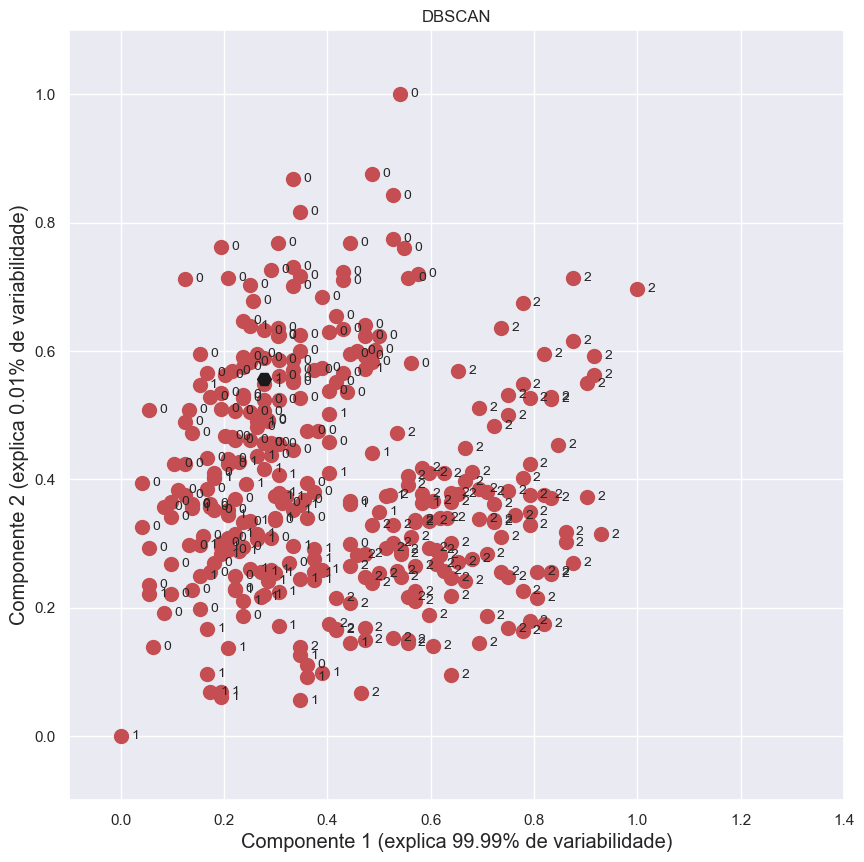

In [40]:
for clf_name, clf, clf_params in cluster_methods:

    par=list(ParameterGrid(clf_params))


    best_estimator=clf
    best_params=par[0]

    #inicilaiza com um valor alto porque no caso do Davies Bouldin queremos o menor valor
    best_score=1e12

    for i in par:
      m=clf.set_params(**i)
      y_pred = m.fit_predict(data)
      db =  metrics.davies_bouldin_score(data, y_pred)
      print(f'Parametro: {i} Score: {db}')
      if db<best_score:
          best_score=db
          best_params=i

    print("Melhor score: "+str(best_score)+" Melhores parâmetros: "+str(best_params))
    clf=clf.set_params(**best_params)

    y_pred = clf.fit_predict(data)


    n_cluster = len(set(y_pred))

    col=['r','b','g','m','y','c']
    clabel=[int(x) for x in y_pred]
    for i in range(len(clabel)):
      k=clabel[i]
      if k == -1:
          clabel[i]='k'
      else:
          clabel[i]=col[k]

    mar=['o','^','*','x','+']
    mlabel=[int(x) for x in y_pred]
    for i in range(len(mlabel)):
      l=mlabel[i]
      if l == -1:
          mlabel[i]='H'
      else:
          mlabel[i]=mar[l]

    pca = decomposition.PCA(n_components = 2)

    cluster_reduced_data = pca.fit_transform(X)

    fig = plt.figure()
    x1=cluster_reduced_data[:,0]; y1=cluster_reduced_data[:,1]

    x1=(x1-x1.min()) /  (x1.max()-x1.min())
    y1=(y1-y1.min()) /  (y1.max()-y1.min())

    for i in range(len(x1)):
      plt.scatter(x1[i],y1[i],marker=mlabel[i],s=100,c=clabel[i])
      plt.text(x1[i]+0.02, y1[i]+0.00, '%s' % y[i], ha='left',va='center',fontsize=10)
    plt.xlim(-0.1, +1.4), plt.ylim(-0.1, +1.1)
    plt.xlabel('Componente 1 (explica '+str("{:.2f}".
    format(100*pca.explained_variance_ratio_[0]))+'% de variabilidade)',size='large')
    plt.ylabel('Componente 2 (explica '+str("{:.2f}".
    format(100*pca.explained_variance_ratio_[1]))+'% de variabilidade)',size='large')
    plt.title(clf_name)
    plt.savefig(clf_name+'2.png',bbox_inches=0)